In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_vol = pd.read_csv('USDJPYVolATM.csv')
df_vol['Date'] = pd.to_datetime(df_vol['Date'])
df_vol = df_vol.sort_values(by='Date')
df_vol = df_vol.set_index('Date')
df_vol

,2W,1M,3M,6M,1Y,2Y,5Y
Date,,,,,,,
2015-01-12,7.4850,8.3125,8.3925,8.8525,9.4675,9.7900,11.0225
2015-02-12,7.7625,8.3000,8.3175,8.8150,9.3950,9.7675,10.9675
2015-03-12,9.3850,7.7750,8.1400,8.7300,9.2950,9.7100,10.9700
2015-04-12,8.5700,6.8250,7.7800,8.4050,9.1000,9.6075,10.8750
2015-07-12,7.5900,6.5550,7.4400,8.2025,9.0600,9.5100,10.8050
...,...,...,...,...,...,...,...
2020-12-03,24.6700,20.5000,16.4900,13.8350,11.7375,10.3800,8.8150
2020-12-05,6.2750,6.9025,7.4075,7.9750,8.0050,7.9700,7.8950
2020-12-06,7.5800,7.2325,7.1300,7.5275,7.2950,7.3250,7.3450


In [183]:
dti = pd.date_range(start = '2015-01-12',end = '2020-12-10',freq='D')
v = np.empty((len(dti),7),dtype=object)
df_sorted = pd.DataFrame(v,index = dti,columns = df_vol.columns)
for i in range(len(dti)):
#     print(i)
    if (dti[i] in df_vol.index):
#     print(i)
#     if len(df.loc[dti[i]])>1:
#         df_sorted.loc[dti[i]]=((df.loc[dti[i]]).values)[0]
#     else:
#         print(i)
#         print(df.loc[dti[i]].iloc[0])
        df_sorted.loc[dti[i]]= df_vol.loc[dti[i]]
#         print(df_sorted.loc[dti[i]])
df_sorted.tail(20)

,2W,1M,3M,6M,1Y,2Y,5Y
2020-11-21,None,None,None,None,None,None,None
2020-11-22,None,None,None,None,None,None,None
2020-11-23,None,None,None,None,None,None,None
2020-11-24,None,None,None,None,None,None,None
2020-11-25,None,None,None,None,None,None,None
2020-11-26,None,None,None,None,None,None,None
2020-11-27,None,None,None,None,None,None,None
2020-11-28,None,None,None,None,None,None,None
2020-11-29,None,None,None,None,None,None,None
2020-11-30,None,None,None,None,None,None,None


In [184]:
df_copy = df_sorted.copy()
for i in range(len(df_sorted)-1):
#     print(i)
    b = np.any(df_sorted.iloc[i+1,:].isna()) or np.any(df_sorted.iloc[i,:].isna())
    if b:
        df_copy.iloc[i,:] = df_sorted.iloc[i+1,:]-df_sorted.iloc[i,:]
df_copy

,2W,1M,3M,6M,1Y,2Y,5Y
2015-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df_vol_diff = df_copy.dropna()

In [4]:
df_vol_diff = df_vol.diff().dropna()

In [5]:
vol1 = df_vol.loc['2016-01-04',:]
vol2 = df_vol.loc['2017-12-04',:]
vol3 = df_vol.loc['2018-12-31',:]

In [6]:
volmean = df_vol.mean()

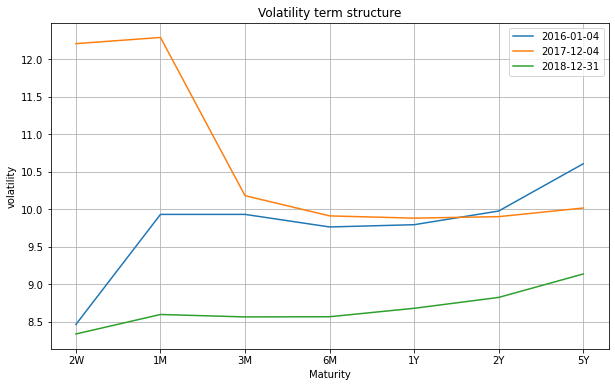

In [7]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
plt.plot(df_vol.columns,vol1.values.flatten(),label = '2016-01-04')
plt.plot(df_vol.columns,vol2.values.flatten(),label = '2017-12-04')
plt.plot(df_vol.columns,vol3.values.flatten(),label = '2018-12-31')
plt.legend()
plt.grid()
plt.title('Volatility term structure')
plt.xlabel('Maturity')
plt.ylabel('volatility')
plt.show()

In [8]:
dff_v = df_vol_diff.values.astype(float)

In [9]:
df_vol_diff = pd.DataFrame(dff_v,index = df_vol_diff.index,columns = df_vol_diff.columns)

In [10]:
df_vol_diff.corr()

,2W,1M,3M,6M,1Y,2Y,5Y
2W,1.000000,0.902321,0.850661,0.828604,0.786965,0.739525,0.563544
1M,0.902321,1.000000,0.917856,0.893273,0.853908,0.809734,0.617571
3M,0.850661,0.917856,1.000000,0.975723,0.947448,0.903674,0.709229
6M,0.828604,0.893273,0.975723,1.000000,0.986313,0.959606,0.791648
1Y,0.786965,0.853908,0.947448,0.986313,1.000000,0.983356,0.844330
2Y,0.739525,0.809734,0.903674,0.959606,0.983356,1.000000,0.907272
5Y,0.563544,0.617571,0.709229,0.791648,0.844330,0.907272,1.000000


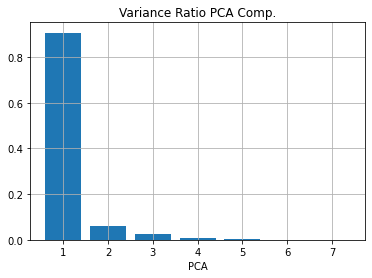

In [11]:
from sklearn.decomposition import PCA
pca_all = PCA(n_components = 7)
pca_all.fit(df_vol_diff)
temp = np.linspace(1,7,7)
plt.bar(temp, pca_all.explained_variance_ratio_)
plt.title("Variance Ratio PCA Comp.")
plt.xlabel('PCA')
plt.grid()
plt.savefig("PCA_Var_Ratio")

In [12]:
pca = PCA(n_components = 3)
pca.fit(df_vol_diff)
print(np.sum((pca.explained_variance_ratio_)))
pca.fit(df_vol_diff)
pca1=pca.components_[0]
pca2=pca.components_[1]
pca3=pca.components_[2]

0.9894242568656877


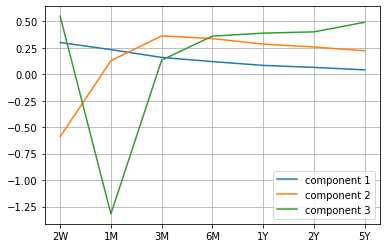

In [13]:
symbols = df_vol.columns
w1 = pca1/np.sum(pca1)
w2 = pca2/np.sum(pca2)
w3 = pca3/np.sum(pca3)
plt.plot(symbols,w1,label='component 1')
plt.plot(symbols,w2,label='component 2')
plt.plot(symbols,w3,label='component 3')
plt.grid()
plt.legend()

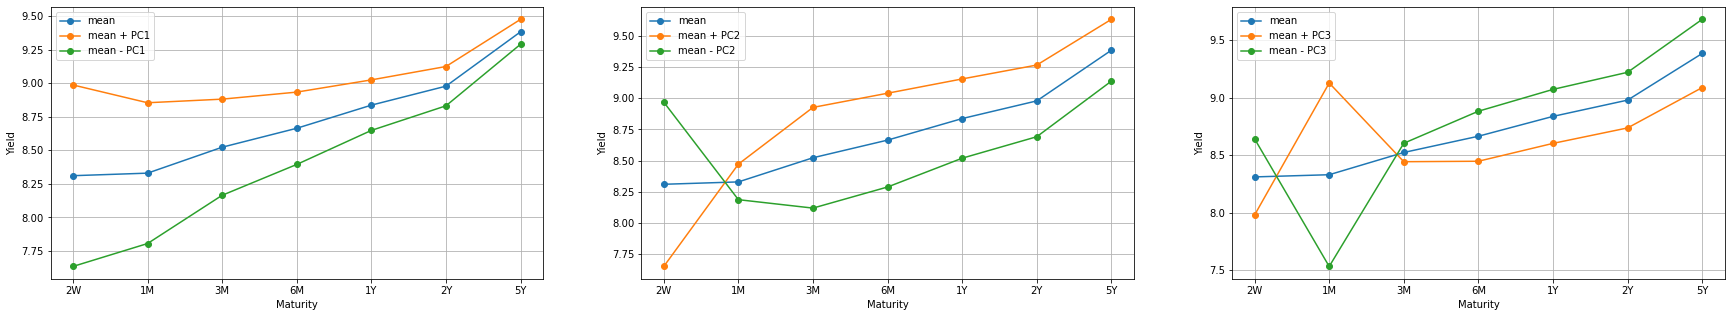

In [25]:
volmean
fix,ax=plt.subplots(1,3,figsize=(30,5))
ax[0].plot(symbols,volmean, marker = 'o', label = "mean")
ax[0].plot(symbols,volmean+pca1, marker = 'o', label = "mean + PC1")
ax[0].plot(symbols,volmean-pca1,marker = 'o', label = "mean - PC1")
ax[0].set_xlabel("Maturity")
ax[0].set_ylabel("Yield")
ax[0].legend()
ax[0].grid()

ax[1].plot(symbols,volmean, marker = 'o', label = "mean")
ax[1].plot(symbols,volmean+pca2, marker = 'o', label = "mean + PC2")
ax[1].plot(symbols,volmean-pca2,marker = 'o', label = "mean - PC2")
ax[1].set_xlabel("Maturity")
ax[1].set_ylabel("Yield")
ax[1].legend()
ax[1].grid()

ax[2].plot(symbols,volmean, marker = 'o', label = "mean")
ax[2].plot(symbols,volmean+pca3, marker = 'o', label = "mean + PC3")
ax[2].plot(symbols,volmean-pca3,marker = 'o', label = "mean - PC3")
ax[2].set_xlabel("Maturity")
ax[2].set_ylabel("Yield")
ax[2].legend()
ax[2].grid()

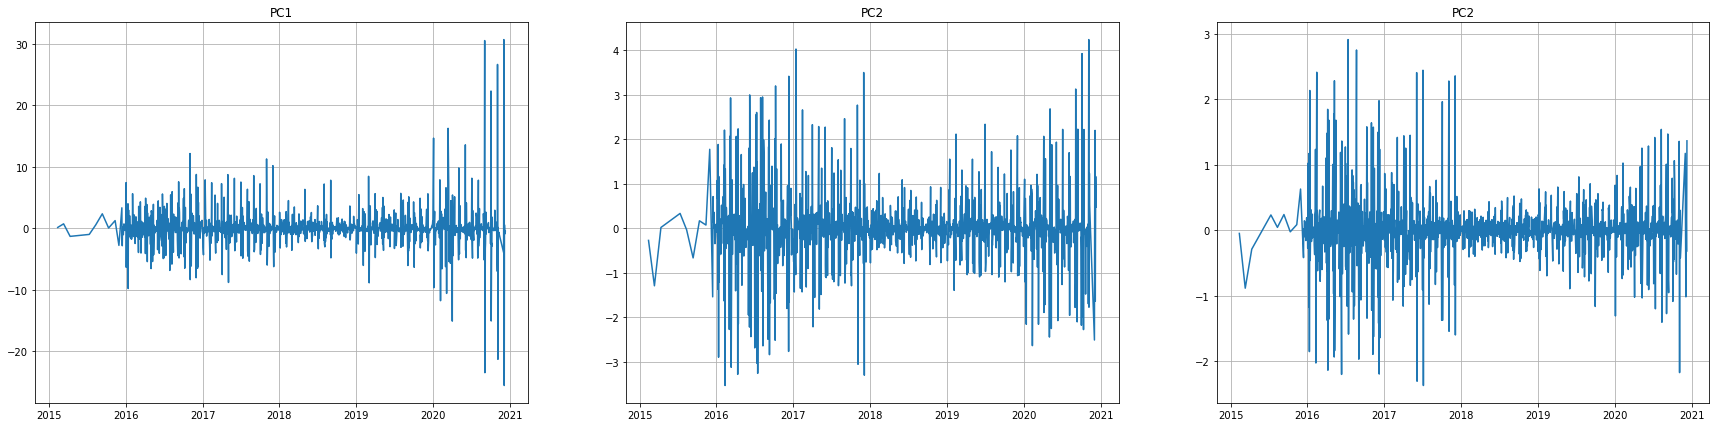

In [14]:
fig,ax = plt.subplots(1,3,figsize=(30,7))
tempPC1 = np.dot(df_vol_diff,pca1)
ax[0].plot(df_vol_diff.index,tempPC1)
ax[0].set_title("PC1")
ax[0].grid()

tempPC2 = np.dot(df_vol_diff,pca2)
ax[1].plot(df_vol_diff.index,tempPC2)
ax[1].set_title("PC2")
ax[1].grid()

tempPC3 = np.dot(df_vol_diff,pca3)
ax[2].plot(df_vol_diff.index,tempPC3)
ax[2].set_title("PC2")
ax[2].grid()


In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import kpss, adfuller
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [16]:
def first_step(df,name):
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    plot_acf(df,ax=ax[0])
    ax[0].set_title(name+' ACF plot')
    
    num = len(df)
    maxLag = int(np.log(num))
    adf = adfuller(df,maxlag=maxLag,regression='ct')
    print('p value for ADF test: ',adf[1])
    kpss_ = kpss(df,lags=maxLag,regression='ct')
    print('p value for KPSS test: ',kpss_[1],'\n')
    print('statistics for KPSS: ',kpss_[0],' criteria: ',kpss_[-1])
    
    ljbox_test = acorr_ljungbox(df,maxLag)#package version
    
    ax[1].plot(ljbox_test[1])
    ax[1].axhline(y=0.05, color='r',ls='--')
    ax[1].set_title("LB test")
    ax[1].grid()
    
    plt.show()

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.008458369630922528  criteria:  {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


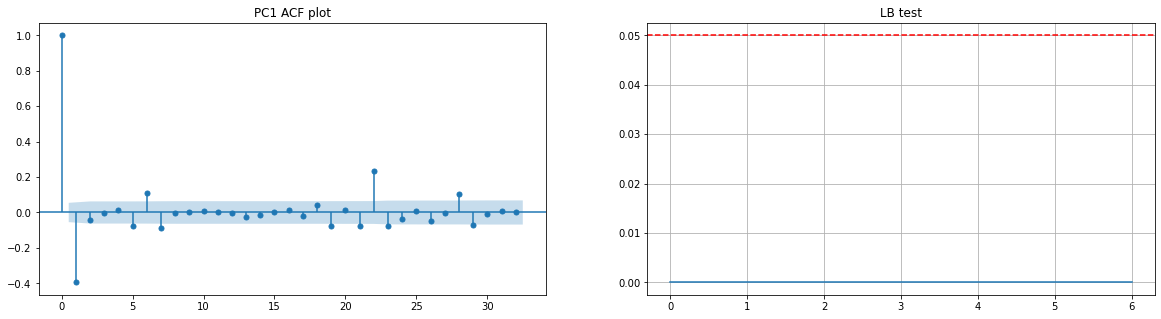

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


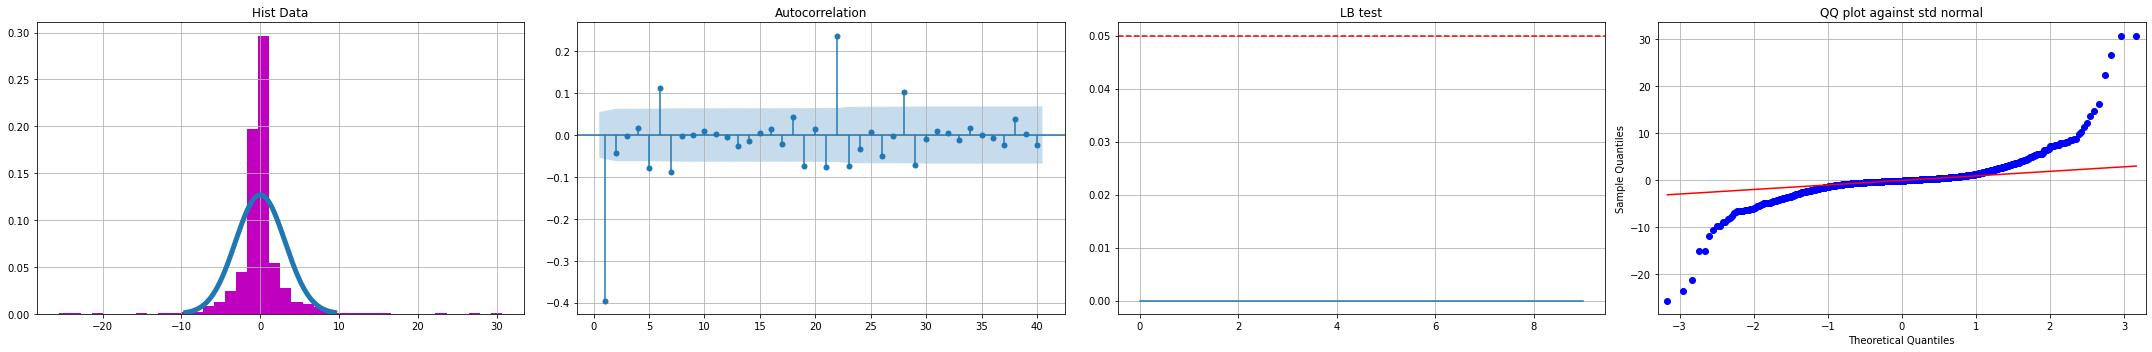

In [26]:
first_step(tempPC1,'PC1')
plot_diagnosticsTight3(tempPC1)

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.007294553743195416  criteria:  {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


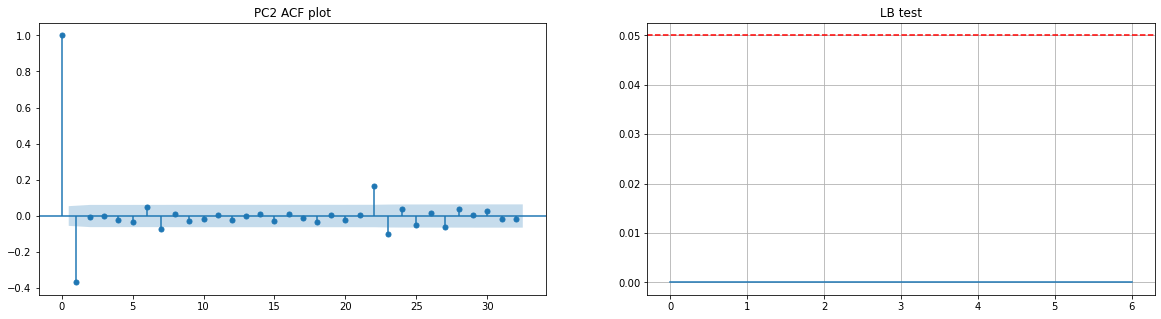

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


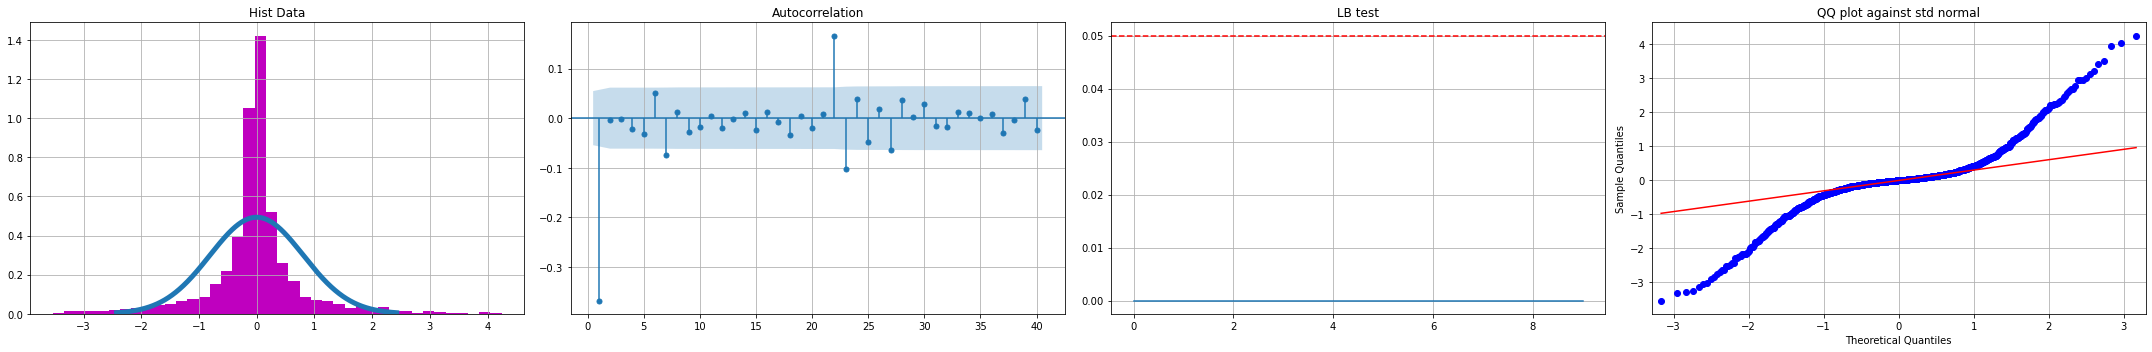

In [22]:
first_step(tempPC2,'PC2')
plot_diagnosticsTight3(tempPC2)

p value for ADF test:  0.0
p value for KPSS test:  0.1 

statistics for KPSS:  0.004664827340327668  criteria:  {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


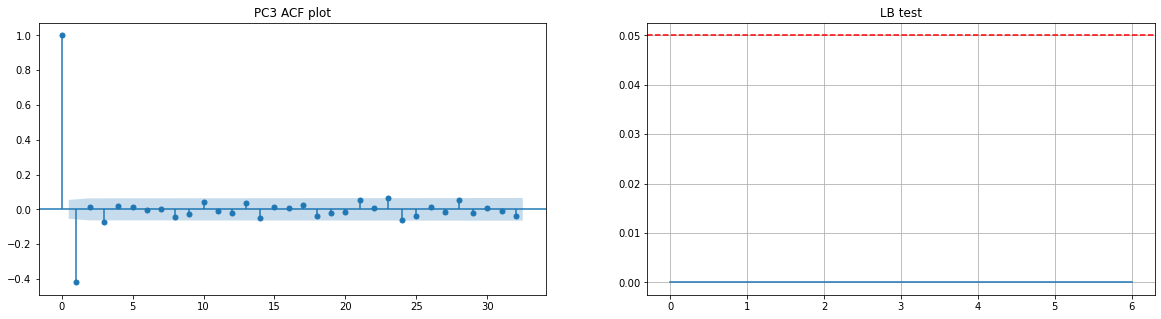

c:\users\xuais\anaconda3\envs\snakes\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


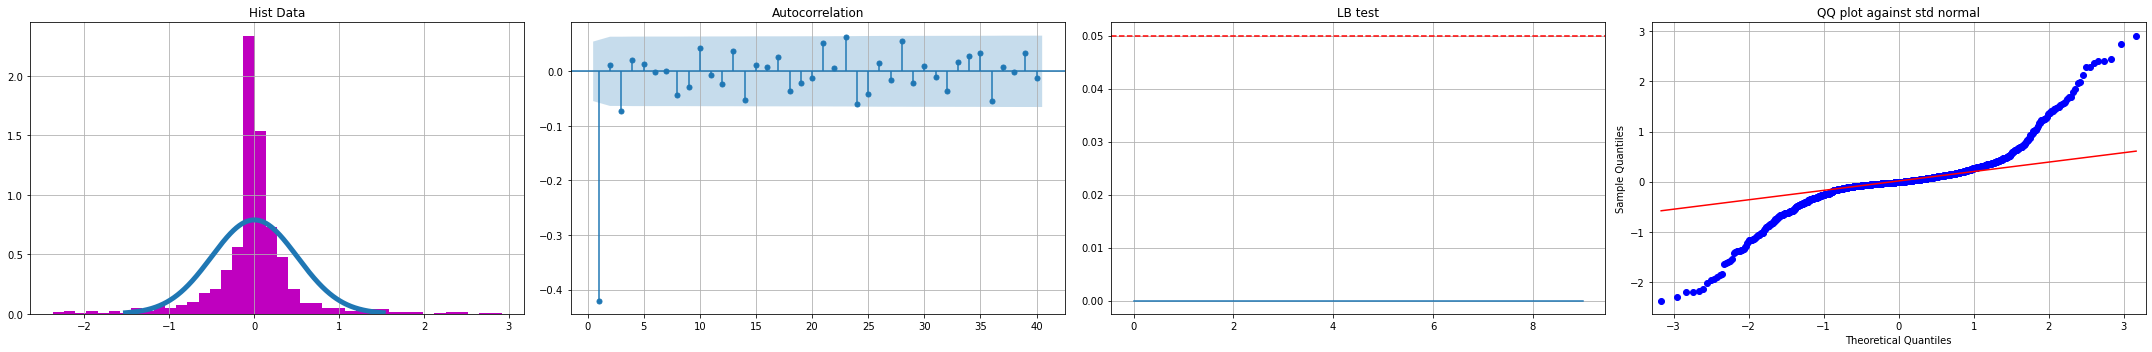

In [23]:
first_step(tempPC3,'PC3')
plot_diagnosticsTight3(tempPC3)

In [18]:
import scipy.stats as stats
import statsmodels.api as sm
def plot_diagnosticsTight3(data):

    fig, (ax1,ax3,ax4,ax5) = plt.subplots(1,4,figsize=(30,5))
    
    ax1.hist(data, bins =40,color='m', density = True)  
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    ax1.grid()
    ax1.set_title("Hist Data")
    
#     ax2.plot(data)
#     ax2.grid()
#     ax2.set_title("Data")
    
    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()
    
    #logData = np.floor(np.log(len(data)))
    ljbox_test = sm.stats.acorr_ljungbox(data,10)#package version
    
    ax4.plot(ljbox_test[1])
    ax4.axhline(y=0.05, color='r',ls='--')
    ax4.set_title("LB test")
    ax4.grid()
    
    fig = sm.qqplot(data, line='q', ax = ax5)
    ax5.grid()
    ax5.set_title('QQ plot against std normal')
    
#     ax6.plot(data*data)
#     ax6.grid()
#     ax6.set_title("Data Sqr")
    
    plt.tight_layout()